In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


# NSL-KDD Dataset Analysis, EDA, and Preprocessing  
### Prepared for Anomaly Detection & Intrusion Detection Models

This notebook includes:
- Data Loading  
- Full EDA  
- Feature Engineering  
- Preprocessing  
- Train-Test Split  

Dataset: **NSL-KDD (Correct 43-column version with attack_name included)**  


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the NSL-KDD Dataset

The dataset contains **43 columns**, where:
- 41 are input features  
- 1 is `attack_name` (decoded attack type)  
- 1 is `label` (numeric encoded attack ID)  

We manually assign column names to ensure correct parsing.


In [4]:
columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes",
    "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
    "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
    "num_shells","num_access_files","num_outbound_cmds","is_host_login",
    "is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
    "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
    "srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
    "dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate",
    "attack_name",
    "label"       
]


In [5]:
df_train = pd.read_csv("/kaggle/input/nslkdd/KDDTrain+.txt", names=columns, sep=",", engine="python")
df_test = pd.read_csv("/kaggle/input/nslkdd/KDDTest+.txt", names=columns, sep=",", engine="python")


In [6]:
df = pd.concat([df_train, df_test], ignore_index=True)

## 2. Basic Data Overview

We inspect:
- Shape  
- Column types  
- Descriptive statistics  
- Missing values  


In [7]:
df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_name,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [9]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
categorical_cols = ["protocol_type", "service", "flag", "attack_name"]

numeric_cols = [c for c in df.columns if c not in categorical_cols + ["label"]]


In [12]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [13]:
df["attack_name"].value_counts()


attack_name
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm     

In [14]:
print(df["flag"].unique()[:10])


['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2']


In [15]:
df["flag"] = df["flag"].astype(str)
categorical_cols = ["protocol_type", "service", "flag"]


## 3. Create Labels

We generate:
- `binary_label` → normal / attack  
- `category` → DoS, Probe, R2L, U2R, Normal  


In [16]:
df["binary_label"] = df["attack_name"].apply(
    lambda x: "normal" if x == "normal" else "attack"
)


In [17]:
df["binary_label"].value_counts()

binary_label
normal    77054
attack    71463
Name: count, dtype: int64

# 4. Exploratory Data Analysis (EDA)

In this section we explore:

### ✔ Class Distribution  
### ✔ Categorical Features  
### ✔ Feature Correlations  
### ✔ Numeric Feature Distributions  
### ✔ Normal vs Attack Comparison  
### ✔ PCA Visualization  


## 4.1 Distribution of Normal vs Attack


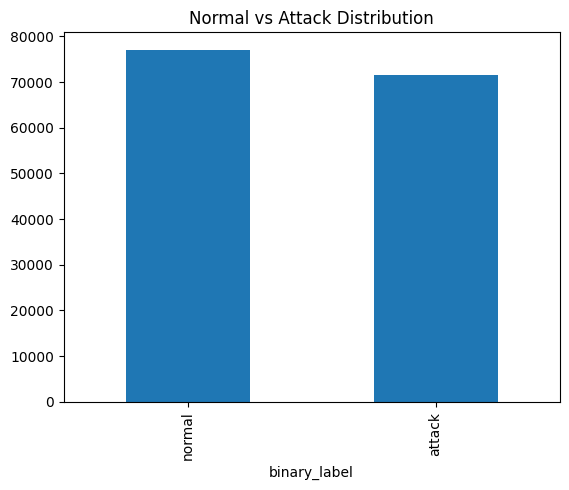

In [18]:
df["binary_label"].value_counts().plot(kind="bar")
plt.title("Normal vs Attack Distribution")
plt.show()


In [19]:
dos = ["back","land","neptune","pod","smurf","teardrop"]
probe = ["ipsweep","nmap","portsweep","satan"]
r2l = ["ftp_write","guess_passwd","imap","multihop","phf","spy","warezclient","warezmaster"]
u2r = ["buffer_overflow","loadmodule","perl","rootkit"]

In [20]:
def classify(a):
    if a == "normal":
        return "normal"
    if a in dos:
        return "DoS"
    if a in probe:
        return "Probe"
    if a in r2l:
        return "R2L"
    if a in u2r:
        return "U2R"
    return "Other"

In [21]:
df["category"] = df["attack_name"].apply(classify)


## 4.2 Distribution of Attack Categories


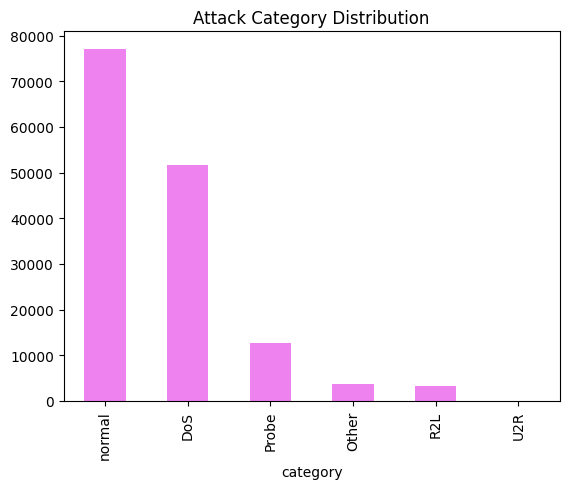

In [22]:
df["category"].value_counts().plot(kind="bar", color="violet")
plt.title("Attack Category Distribution")
plt.show()


## 4.3 Categorical Feature Overview  
We inspect:
- protocol_type  
- service  
- flag  


In [23]:
df["category"].value_counts()

category
normal    77054
DoS       51668
Probe     12762
Other      3750
R2L        3194
U2R          89
Name: count, dtype: int64

In [24]:
df["protocol_type"].value_counts()


protocol_type
tcp     121569
udp      17614
icmp      9334
Name: count, dtype: int64

In [25]:
df["service"].value_counts().head(10)

service
http        48191
private     26627
domain_u     9937
smtp         8247
ftp_data     7711
other        5197
eco_i        4848
telnet       3979
ecr_i        3829
ftp          2446
Name: count, dtype: int64

In [26]:
df["flag"].value_counts()

flag
SF        89820
S0        36864
REJ       15083
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: count, dtype: int64

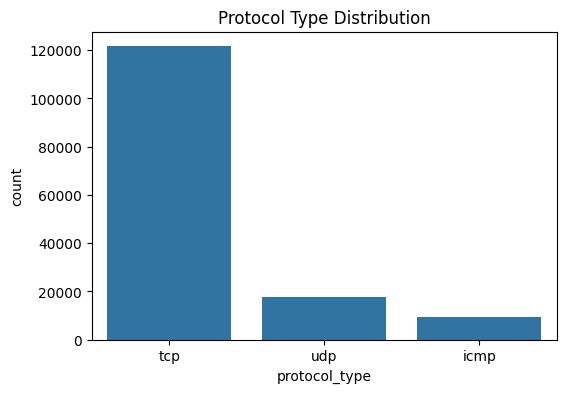

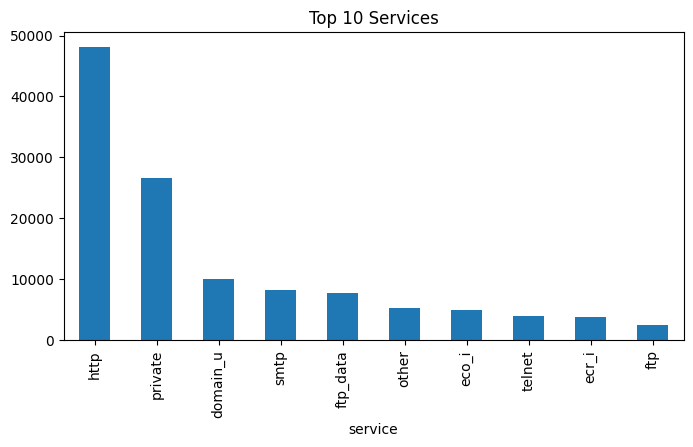

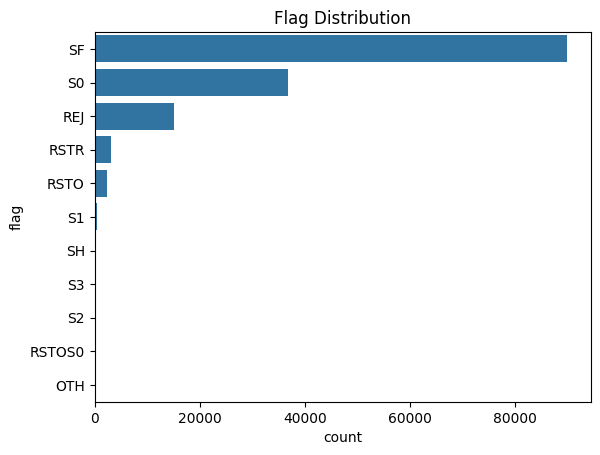

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["protocol_type"])
plt.title("Protocol Type Distribution")
plt.show()

df["service"].value_counts().head(10).plot(kind="bar", figsize=(8,4))
plt.title("Top 10 Services")
plt.show()

sns.countplot(y=df["flag"], order=df["flag"].value_counts().index)
plt.title("Flag Distribution")
plt.show()


## 4.4 Numeric Feature Correlation Heatmap


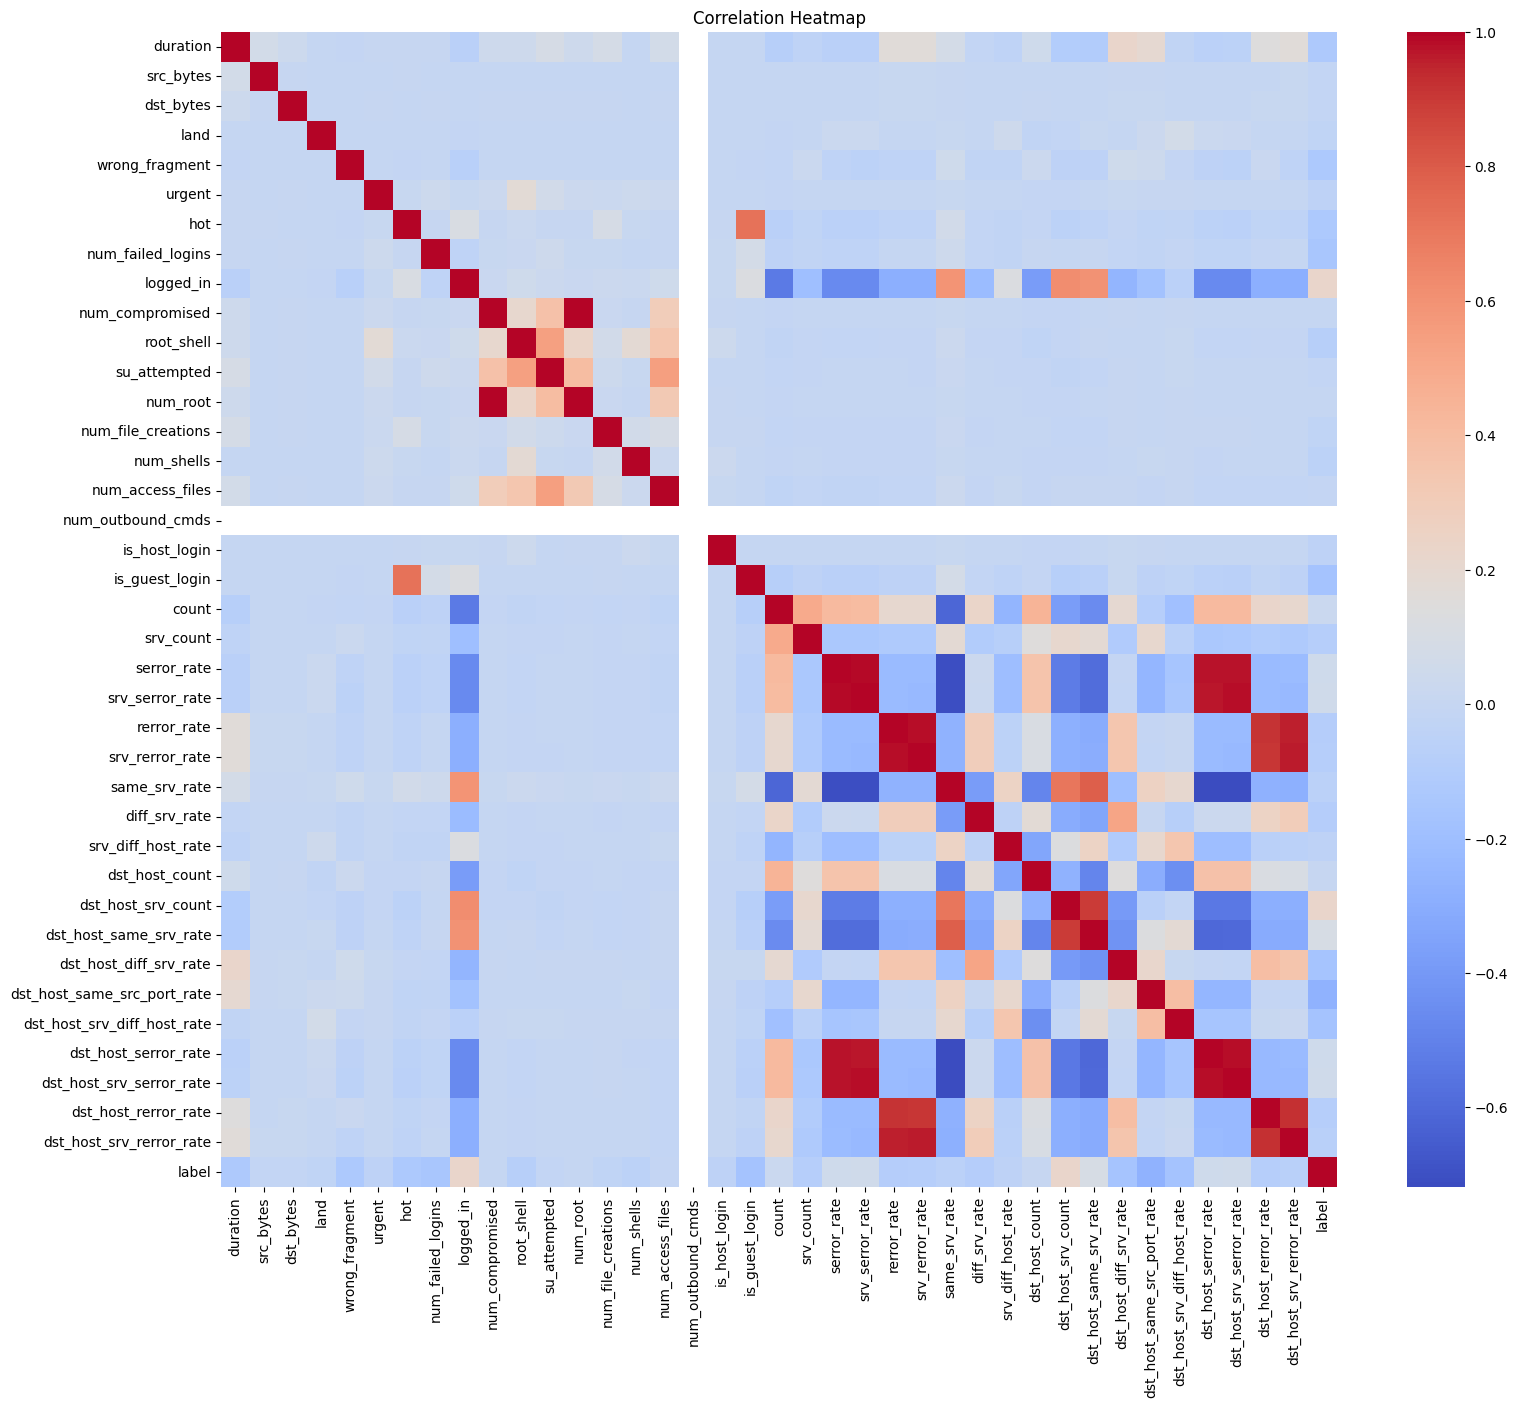

In [28]:
plt.figure(figsize=(18,15))
numeric_only = df.select_dtypes(include=["int64","float64"])
sns.heatmap(numeric_only.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 4.5 Feature Distributions  
We plot histograms for key features.


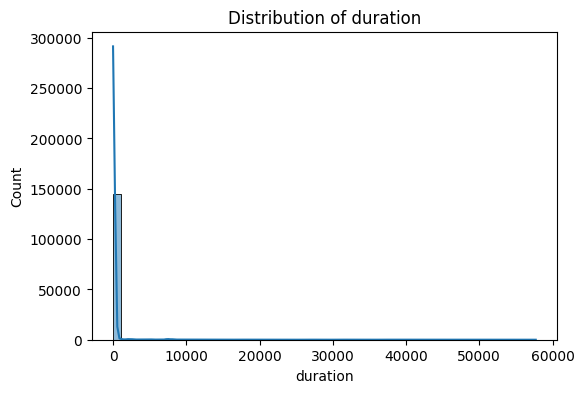

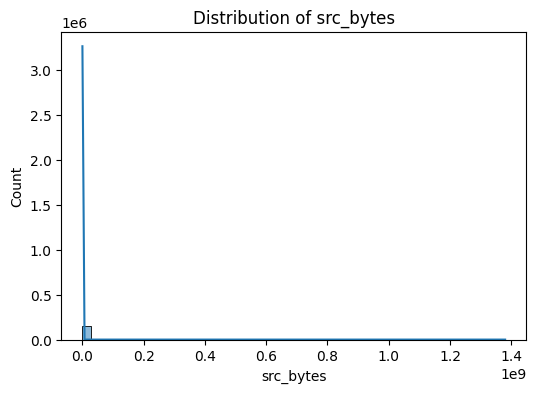

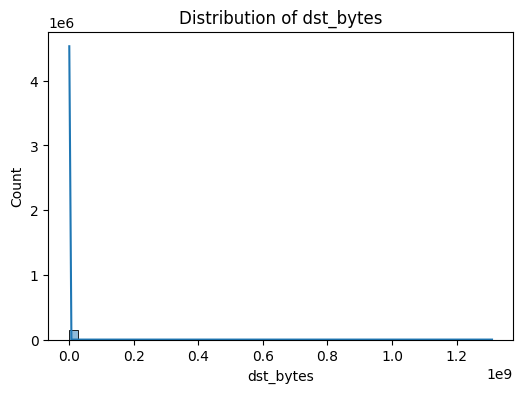

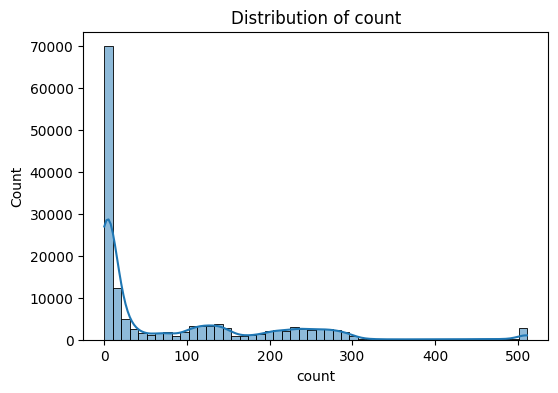

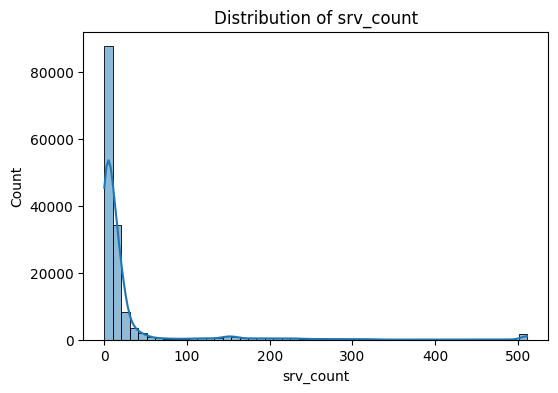

In [29]:
for col in ["duration", "src_bytes", "dst_bytes", "count", "srv_count"]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()


# 5. Preprocessing for Machine Learning
- One-hot encoding  
- Scaling  
- Train-test split  


## 5.1 One-hot Encoding

In [30]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [31]:
numerical_cols = [
    col for col in df.columns
    if col not in [
        "attack_name", "label", "binary_label", "category"
    ] 
    and not col.startswith("protocol_type_")
    and not col.startswith("service_")
    and not col.startswith("flag_")
]


In [32]:
df.dtypes


duration          int64
src_bytes         int64
dst_bytes         int64
land              int64
wrong_fragment    int64
                  ...  
flag_S1            bool
flag_S2            bool
flag_S3            bool
flag_SF            bool
flag_SH            bool
Length: 123, dtype: object

## 5.2 Scaling

In [33]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [34]:
df[numerical_cols].head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.344349,-0.849240,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815
1,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,0.721338,-1.065006,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815
2,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,0.721338,-0.840250,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815
3,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-1.562277,1.218511,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989
4,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,0.721338,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815


In [35]:
df[numerical_cols].dtypes

duration                       float64
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

In [36]:
X = df.drop(["attack_name","label","binary_label","category"], axis=1)
y = df["binary_label"]


## 5.3 Train-Test Split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=21
)


In [39]:
def evaluate_model(y_true, y_pred, y_score=None):
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1_score": f1_score(y_true, y_pred)
    }
    
    if y_score is not None:
        metrics["roc_auc"] = roc_auc_score(y_true, y_score)
    
    return metrics


In [41]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [44]:
# Convert string labels to binary
y_test = y_test.map(lambda x: 0 if x == 'normal' else 1)


### Isolation Forest – Model Training and Evaluation


In [45]:
iso_forest = IsolationForest(
    n_estimators=200,
    contamination="auto",
    random_state=42
)

iso_forest.fit(X_train)

# Predictions
y_pred_if = iso_forest.predict(X_test)

# Convert labels: {-1, 1} → {1, 0}
y_pred_if = np.where(y_pred_if == -1, 1, 0)

# Anomaly scores
y_score_if = -iso_forest.decision_function(X_test)

# Evaluation
if_metrics = evaluate_model(y_test, y_pred_if, y_score_if)

print("Isolation Forest Metrics")
print(if_metrics)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_if))


Isolation Forest Metrics
{'accuracy': 0.5188863452733639, 'precision': 1.0, 'recall': 0.00013992863639543832, 'f1_score': 0.00027981811822315494, 'roc_auc': np.float64(0.7565158782842046)}
Confusion Matrix
[[15411     0]
 [14291     2]]


### One-Class SVM – Model Training and Evaluation


In [46]:
ocsvm = OneClassSVM(
    kernel="rbf",
    gamma="scale",
    nu=0.05
)

ocsvm.fit(X_train)

# Predictions
y_pred_svm = ocsvm.predict(X_test)

# Convert labels: {-1, 1} → {1, 0}
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

# Decision scores
y_score_svm = -ocsvm.decision_function(X_test)

# Evaluation
svm_metrics = evaluate_model(y_test, y_pred_svm, y_score_svm)

print("One-Class SVM Metrics")
print(svm_metrics)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))


One-Class SVM Metrics
{'accuracy': 0.5380756800430918, 'precision': 0.6857142857142857, 'recall': 0.07388232001679143, 'f1_score': 0.13339228194277775, 'roc_auc': np.float64(0.8613927862334302)}
Confusion Matrix
[[14927   484]
 [13237  1056]]


### Autoencoder – Model Training


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


2026-01-01 07:36:23.322897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767252983.575313      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767252983.647256      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767252984.228230      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767252984.228285      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767252984.228288      55 computation_placer.cc:177] computation placer alr

In [48]:
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation="relu")(input_layer)
encoded = Dense(32, activation="relu")(encoded)

decoded = Dense(64, activation="relu")(encoded)
decoded = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")


2026-01-01 07:36:40.753364: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Autoencoder – Anomaly Detection and Evaluation


In [49]:
autoencoder.fit(
    X_train, X_train,
    epochs=30,
    batch_size=256,
    validation_split=0.1,
    shuffle=True,
    verbose=1
)


Epoch 1/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1878 - val_loss: 0.1582
Epoch 2/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0748 - val_loss: 0.1318
Epoch 3/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0475 - val_loss: 0.1136
Epoch 4/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0197 - val_loss: 0.1025
Epoch 5/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182 - val_loss: 0.0997
Epoch 6/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0162 - val_loss: 0.0892
Epoch 7/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0122 - val_loss: 0.0904
Epoch 8/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0137 - val_loss: 0.0697
Epoch 9/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0096 - val_loss: 0.0725
Epoch 10/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0128 - val_loss: 0.0545
Epoch 11/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0097 - val_loss: 0.0577
Epoch 12/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [50]:
reconstructions = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - reconstructions), axis=1)

threshold = np.percentile(reconstruction_error, 95)

y_pred_ae = (reconstruction_error > threshold).astype(int)

ae_metrics = evaluate_model(y_test, y_pred_ae, reconstruction_error)

print("Autoencoder Metrics")
print(ae_metrics)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_ae))


929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Autoencoder Metrics
{'accuracy': 0.5212429302450848, 'precision': 0.5242261103633916, 'recall': 0.054502203876023225, 'f1_score': 0.09873883009062678, 'roc_auc': np.float64(0.7936824917364949)}
Confusion Matrix
[[14704   707]
 [13514   779]]
